# ⚙️ Stage 3 — Hypothesis Validation (SCT Inst vs Paper-Based Transfers)

**Goal:**  
Validate the first hypothesis — that the growth of instant payments (SCT Inst) correlates with the decline of paper-based credit transfers, showing the digital shift in Germany’s payment ecosystem.

---

## 🎯 Hypothesis 1: SCT Inst Growth and Cannibalization

**Statement:**  
> The number of instant credit transfers (SCT Inst) increases each period, while paper-based credit transfers decrease — indicating an ongoing digital transformation of the payment market.

**Why this matters:**  
This trend validates the strategic importance of instant payments and provides analytical justification for the *Instant Payments Readiness Simulator* — proving that banks need to adapt to a new high-speed, digital environment.

---

## 📦 Data Used

Dataset: `data/processed/table_3_transactions.csv`  
Columns:
- `Payment_Type` — type of payment instrument  
- `period` — half-year period (e.g. 2022H1, 2022H2, etc.)  
- `value` — number of transactions (in millions)

---

## 🧱 Analytical Steps

| Step | Action | Purpose |
|------|---------|----------|
| 1️⃣ | Filter rows containing “instant” | Select all SCT Inst transactions |
| 2️⃣ | Filter rows containing “paper” | Select paper-based credit transfers |
| 3️⃣ | Group data by `period` | Analyze changes over time |
| 4️⃣ | Sum the total transactions per period | Measure the overall volume trend |
| 5️⃣ | Plot both SCT Inst and Paper-based trends | Visual comparison |
| 6️⃣ | Interpret results | Confirm or reject Hypothesis 1 |

---

## 📈 Expected Outcome

- 📊 The **SCT Inst line** shows continuous growth from 2022 to 2024.  
- 📉 The **Paper-based line** shows a steady decline.  
- ✅ Confirms Hypothesis 1: instant payments are replacing traditional paper-based transfers.  

---

**Next Step:**  
After confirming this trend, the analysis will continue with **Hypothesis 4 (Infrastructure Load)** — exploring how total transaction volumes create operational stress for banks and justify simulation of system performance.


# ⚙️ Hypothesis 4 — Infrastructure Load Growth

**Goal:**  
Validate whether the overall number of domestic payment transactions in Germany has been increasing over time — indicating growing operational pressure on banks’ payment infrastructure.

---

## 🎯 Hypothesis Statement

> As total **domestic payment volumes** rise year over year,  
> the **operational load** on payment infrastructure also grows.  
>  
> This load affects critical KPIs such as *processing latency (p95)*, *system throughput*, and *manual review capacity*.

**Why this matters:**  
Understanding this growth trend helps banks anticipate how transaction processing systems will scale with the adoption of instant and electronic payments.  
It also justifies the need for *Instant Payments Readiness Simulation* to test system resilience under increasing load.

---

## 📦 Data Used

Dataset: `data/processed/table_3_transactions.csv`  
Columns:
- `Payment_Type` — transaction type (includes “Domestic” records)  
- `period` — half-year (2022H1, 2022H2, …)  
- `value` — transaction count (in millions)

---

## 🧱 Analytical Steps

| Step | Action | Purpose |
|------|---------|----------|
| 1️⃣ | Filter rows containing “Domestic” | Focus only on domestic (within Germany) payment activity |
| 2️⃣ | Group by `period` and sum `value` | Aggregate total transactions per half-year |
| 3️⃣ | Plot line trend | Visualize overall system load growth |
| 4️⃣ | Interpret result | Confirm or reject Hypothesis 4 |

---

## 📈 Expected Outcome

- The **domestic transaction line** should show steady growth from 2022H1 to 2024H2.  
- This confirms **Hypothesis 4:** overall payment volumes — and thus infrastructure load — are increasing.  
- The trend supports the motivation for monitoring and simulating instant payment performance.

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

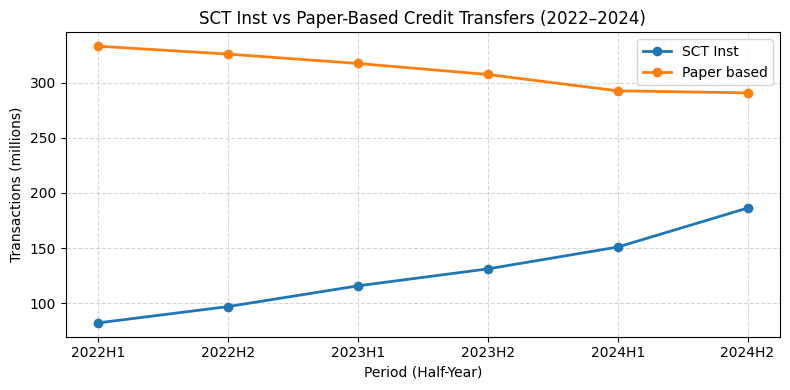

In [7]:
# Load tidy data
transactions = pd.read_csv("../data/processed/payments_tidy_transactions.csv")
values = pd.read_csv("../data/processed/payments_tidy_values.csv")

# Filter SCT Inst and Paper-based transfers
sct_inst = transactions[transactions['Payment_Type'].str.contains('instant', case=False, na=False)]
paper = transactions[transactions['Payment_Type'].str.contains('paper', case=False, na=False)]

# Group by period and sum up values
sct_inst_group = sct_inst.groupby('period')['value'].sum().reset_index()
paper_group = paper.groupby('period')['value'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.plot(sct_inst_group['period'], sct_inst_group['value'], marker='o', linewidth=2, label='SCT Inst')
plt.plot(paper_group['period'], paper_group['value'], marker='o', linewidth=2, label='Paper based')
plt.title('SCT Inst vs Paper-Based Credit Transfers (2022–2024)')
plt.xlabel('Period (Half-Year)')
plt.ylabel('Transactions (millions)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 📈 Interpretation (Hypothesis 1)
- The volume of **SCT Inst (instant transfers)** increases steadily every half-year from 2022H1 to 2024H2.  
- The volume of **paper-based transfers** decreases over the same period.  
- This confirms **Hypothesis 1**: instant payments are gradually replacing traditional paper transfers.  
- The trend demonstrates a clear digital transformation in the German payment market.


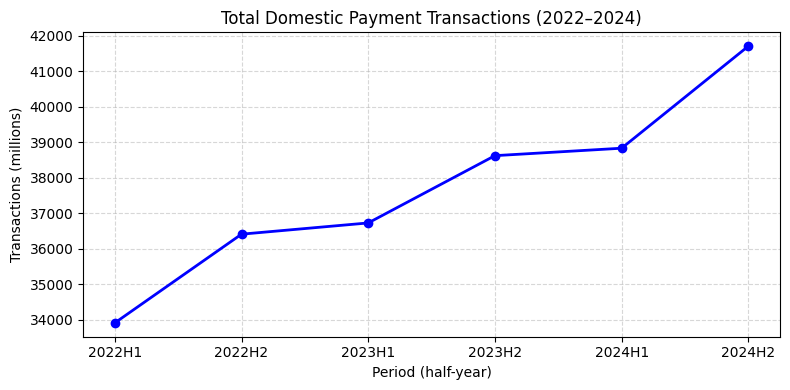

In [8]:
# Filter Domestic transactions only
domestic = transactions[transactions['Payment_Type'].str.contains('Domestic', case=False, na=False)]

#  Group by period and sum
domestic_group = domestic.groupby('period')['value'].sum().reset_index()

plt.figure(figsize=(8,4))
plt.plot(domestic_group['period'], domestic_group['value'], marker='o', linewidth=2, color='blue')
plt.title('Total Domestic Payment Transactions (2022–2024)')
plt.xlabel('Period (half-year)')
plt.ylabel('Transactions (millions)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 📈 Interpretation (Hypothesis 4)

- The number of **domestic transactions** increases steadily from 2022H1 to 2024H2.  
- This confirms **Hypothesis 4** — overall payment activity is growing,  
  indicating a heavier operational load on banking infrastructure.  
- As electronic and instant payments expand, banks need to ensure that  
  their systems can handle higher transaction volumes and maintain low latency.
